In [4]:
"""
    Polynomial Regression of degree 1, 2, 3, 4, 5, 6
"""

'\n    Polynomial Regression of degree 1, 2, 3, 4, 5, 6\n'

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv("assets/dataset.txt", sep = ",", names = ["id", "longtitude", "latitude", "altitude"])

In [7]:
#Normalizing Data
df = (df-df.mean())/df.std()

In [8]:
valueArray = df.to_numpy()

In [9]:
#Splitting dataset using 70-30 cross validation technique
train_size = int(0.7 * valueArray.shape[0])
train_X = valueArray[0:train_size, 1:3]
train_X = np.insert(train_X,0,1,axis=1) #Adding bias
train_Y = valueArray[0:train_size, 3:]
test_X = valueArray[train_size + 1:, 1:3]
test_X = np.insert(test_X,0,1,axis=1) #Adding bias
test_Y = valueArray[train_size + 1:, 3:]

In [10]:
# Testing metrics
train_RMSE = {}
train_R2 = {}
test_RMSE = {}
test_R2 = {}
def RMSE(actualY, predictedY):
    N = actualY.shape[0]
    RMSE = np.sqrt(np.sum((np.power(actualY - predictedY, 2)/N), axis = 0))
    return RMSE
def R2(actualY, predictedY):
    meanY = np.mean(actualY, axis = 0)
    TSS = np.sum(np.power(actualY - meanY, 2), axis = 0)
    RSS = np.sum(np.power(actualY - predictedY, 2), axis = 0)
    return (1 - RSS/TSS)

In [11]:
# For only degree >= 2
def addPolynomialFeatures(X, degree):
    for i in range(degree + 1):
        X = np.concatenate((X, X[:,1:2]**(i) * X[:,2:3]**(degree - i)), axis=1)
    return X

In [22]:
def gradientDescent(X, Y, X_test, Y_test, alpha, maxIterations, weights, degree):
    """
    This function implements all the batch gradient descent with no regularization.
    At each iteration all the weights are updated with gradient calculated
    over all training points
    """
    # Training
    costs = []
    iters = []
    trainX = X
    trainY = Y
    m = trainX.shape[0]
    prevCost, currCost = 0.0, 0.0
    for iteration in range(maxIterations):
        gradient = np.sum(trainX * (trainX @ weights.T - trainY), axis=0)
        currCost = np.sum(np.power(((trainX @ weights.T) - trainY),2))/(2 * m)
        weights = weights - (alpha/m) * gradient
        #Plotting loss over train set for every 20 iterations
        if iteration % 20 == 0:
            costs.append(currCost)
            iters.append(iteration + 1)
        #Stopping Criterion
        if iteration != 0 and abs(prevCost - currCost) < 1e-10:
            break
        prevCost = currCost
    print("Optimal Cost is {}".format(currCost))
    print("Converging at {}th iteration with learning rate {}".format(iteration+1,alpha))
    plt.title("Gradient Descent of Polynomial Regression of degree {}".format(degree))
    plt.xlabel("No Of Iterations")
    plt.ylabel("Cost")
    plt.plot(iters,costs)
    plt.show()
    train_RMSE['batch' + str(degree)] = RMSE(Y, X.dot(weights.T))[0]
    train_R2['batch' + str(degree)] = R2(Y, X.dot(weights.T))[0]
    # Testing
    Y_predicted = X_test.dot(weights.T)
    test_RMSE['batch' + str(degree)] = RMSE(Y_test, Y_predicted)[0]
    test_R2['batch' + str(degree)] = R2(Y_test, Y_predicted)[0]
    #return weights

Optimal Cost is 0.49843225036551936
Converting at 1477th iteration with learning rate 0.01


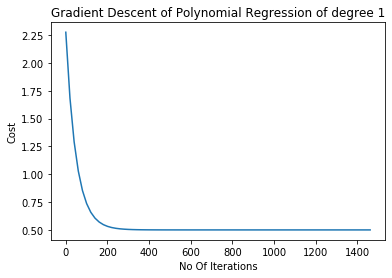

In [19]:
# Degree 1
gradientDescent(train_X, train_Y, test_X, test_Y, 0.01, 2000, np.random.randn(1, train_X.shape[1]), 1)

Optimal Cost is 0.48564650051042835
Converging at 1161th iteration with learning rate 0.05


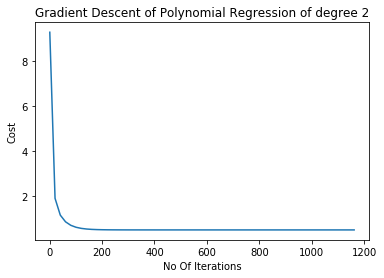

In [ ]:
# Degree 2 to 6
for degree in range(2, 7):
    X_train = addPolynomialFeatures(train_X, degree)
    X_test = addPolynomialFeatures(test_X, degree)
    gradientDescent(X_train, train_Y, X_test, test_Y, 0.05, 4000, np.random.randn(1, X_train.shape[1]), degree)

In [ ]:
# Regularization